In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
import pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial import distance


In [0]:
data_tuple = [('A',0.1,0), # A
              ('B',0.6,0),  # B
              ('C',0.8,0),  # C
              ('D',2.0,0),  # D
              ('E',3.0,0)]  # E
              # ('F',6,0),  # F
              # ('G',1,0),  # G
              # ('H',4,0)]  # H

data_tuple = pd.DataFrame(data_tuple, columns=['LABEL','X','Y'])
data_tuple = data_tuple.drop(['LABEL'], axis=1)


Text(0.5, 0, 'Y')

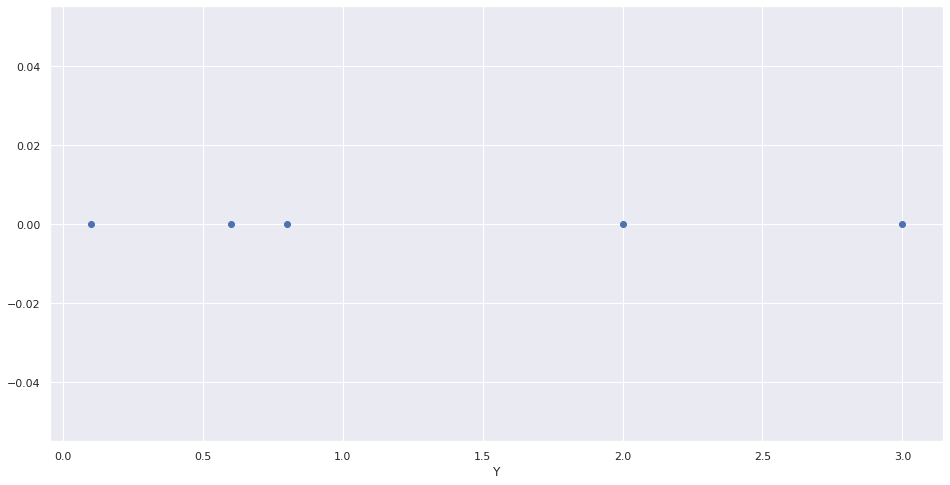

In [8]:
fig = plt.gcf()
fig.set_size_inches(16, 8)
plt.scatter(data_tuple['X'], data_tuple['Y']);
plt.xlabel('X')
plt.xlabel('Y')

In [9]:
init_centroid = np.array([[0.1,0],[0.6,0]],dtype=float)
kmeans = KMeans(n_clusters=2, n_init=5, init=init_centroid)
kmeans.fit(data_tuple)
y_kmeans = kmeans.predict(data_tuple)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=5
  This is separate from the ipykernel package so we can avoid doing imports until


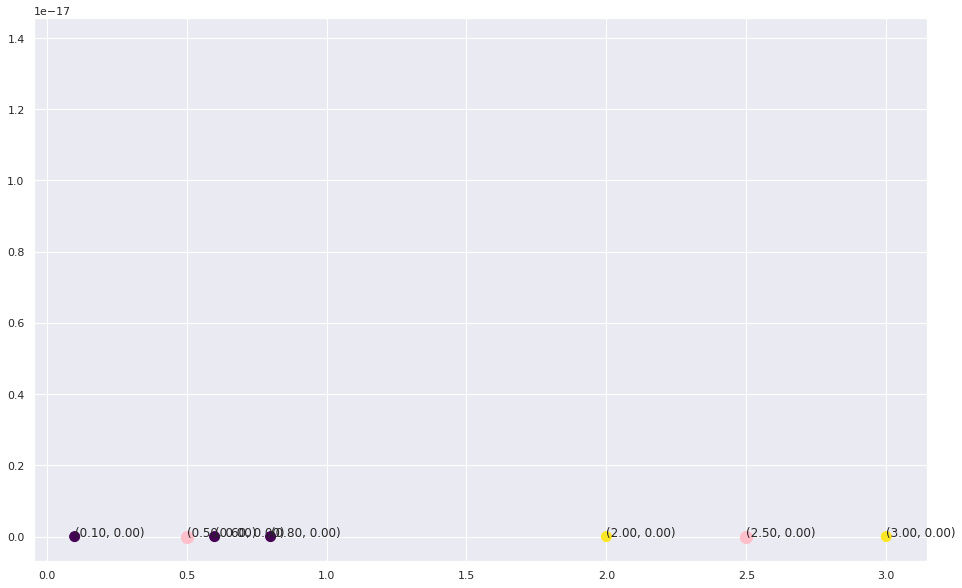

In [10]:
fig = plt.figure()

fig.set_size_inches(16, 10)
ax = fig.add_subplot(111)
plt.scatter(data_tuple['X'], data_tuple['Y'], c=y_kmeans, cmap='viridis',s=100)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='pink', s=150);
for xy in zip(data_tuple['X'], data_tuple['Y']):                                       
    ax.annotate('(%0.2f, %0.2f)' % xy, xy=xy, textcoords='data') 
for xy in zip(centers[:,0], centers[:,1]):                                       
    ax.annotate('(%0.2f, %0.2f)' % xy, xy=xy, textcoords='data') 


In [11]:
centers

array([[0.5, 0. ],
       [2.5, 0. ]])

In [0]:
k = 2
iterations = 3

In [0]:
data= np.array(data_tuple)
centroid_matrix = np.zeros([data.shape[0],k])
centroid_class = np.zeros([data.shape[0],1])

In [14]:
for iter in range(iterations):
  for i in range(data.shape[0]):
      for j in range(centroid_matrix.shape[1]):
        centroid_matrix[i][j]=distance.euclidean(data[i],init_centroid[j])

      min_value = centroid_matrix[i][0]      
      min_index = 0
      for m in range(0,k):
        if centroid_matrix[i][m]<min_value:
          min_value=centroid_matrix[i][m]
          min_index=m
      centroid_class[i]=min_index

  for n in range(k):
    count=0
    sum_x=0
    sum_y= 0
    for o in range(data.shape[0]):
      if centroid_class[o]==n:
        sum_x = sum_x + data[o][0]
        sum_y = sum_y + data[o][1]
        count=count+1
    init_centroid[n][0]=sum_x/count
    init_centroid[n][1]=sum_y/count
  print("---------------------------------------------------------------------------------------")
  print("Distance matrix- ")
  print(centroid_matrix)
  print()
  print("Centroid class(add+1 for mapping)")
  print(centroid_class)
  print()
  print("(New)Init centroid after iteration"+str(iter+1))
  print(init_centroid)
  print()

---------------------------------------------------------------------------------------
Distance matrix- 
[[0.  0.5]
 [0.5 0. ]
 [0.7 0.2]
 [1.9 1.4]
 [2.9 2.4]]

Centroid class(add+1 for mapping)
[[0.]
 [1.]
 [1.]
 [1.]
 [1.]]

(New)Init centroid after iteration1
[[0.1 0. ]
 [1.6 0. ]]

---------------------------------------------------------------------------------------
Distance matrix- 
[[0.  1.5]
 [0.5 1. ]
 [0.7 0.8]
 [1.9 0.4]
 [2.9 1.4]]

Centroid class(add+1 for mapping)
[[0.]
 [0.]
 [0.]
 [1.]
 [1.]]

(New)Init centroid after iteration2
[[0.5 0. ]
 [2.5 0. ]]

---------------------------------------------------------------------------------------
Distance matrix- 
[[0.4 2.4]
 [0.1 1.9]
 [0.3 1.7]
 [1.5 0.5]
 [2.5 0.5]]

Centroid class(add+1 for mapping)
[[0.]
 [0.]
 [0.]
 [1.]
 [1.]]

(New)Init centroid after iteration3
[[0.5 0. ]
 [2.5 0. ]]



In [15]:
init_centroid

array([[0.5, 0. ],
       [2.5, 0. ]])